# Defect_Classification_CNN

* Written by: Angelo D. Bonzanini and Ketong Shao
* Date: June-July 2021

<< Code Desctription >>

## Imports

In [1]:
# General
import numpy as np
import matplotlib.pyplot as plt
import os

# Tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras import Model

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
execution_path = '/content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas'

# import tensorflow_addons as tfa
# # ImageAI
# from imageai.Detection import ObjectDetection
# from PIL import Image as im
# from PIL import ImageOps
# from matplotlib import cm
# import pandas as pd

Mounted at /content/gdrive


## Load pre-processed data

In [2]:
xTrain = np.load(execution_path+'/../Data/xTrain.npy')
yTrain = np.load(execution_path+'/../Data/yTrain.npy')
xVal = np.load(execution_path+'/../Data/xVal.npy')
yVal = np.load(execution_path+'/../Data/yVal.npy')

## Define a class containing all the parameters

In [3]:
class Parameters:
    def __init__(self):
        self.Ntrain = xTrain.shape[0]
        self.imgSize = [xTrain.shape[1],xTrain.shape[2]]
        self.dropoutRate = 0.5
        

p = Parameters();

23780


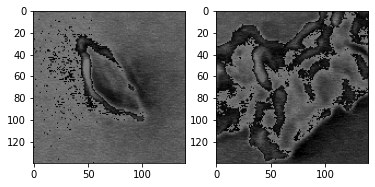

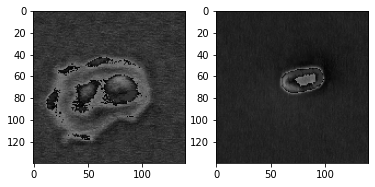

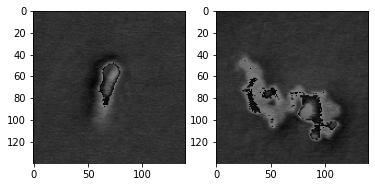

In [4]:
print(len(xTrain))
for i in range(0, 3):
    plt.subplot(121)
    plt.imshow(xTrain[i])
    plt.subplot(122)
    plt.imshow(xVal[i])
    plt.show()

## Build the CNN model

### Input Layer
* 224x224 RGB image (3 channels)

### 1st Convolutional Block
* 2 convolutional layers
    * Filters: 64; Pixel size: 3x3; Stride: 1; Activation function: ReLU
* 1 max-pooling layer
    * Pixel size: 2x2; Stride: 2
    
### 2nd Convolutional Block
* 2 convolutional layers
    * Filters: 128; Pixel size: 3x3; Stride: 1; Activation function: ReLU
* 1 max-pooling layer
    * Pixel size: 2x2; Stride: 2
    
### 3rd Convolutional Block
* 3 convolutional layers
    * Filters: 256; Pixel size: 3x3; Stride: 1; Activation function: ReLU
* 1 max-pooling layer
    * Pixel size: 2x2; Stride: 2

### 4th & 5th Convolutional Blocks
* 3 convolutional layers
    * Filters: 512; Pixel size: 3x3; Stride: 1; Activation function: ReLU
* 1 max-pooling layer
    * Pixel size: 2x2; Stride: 2
    
### 1st Fully-connected Layer
* 4096 nodes
* ReLU activation function
* 50% dropout rate

### 2nd Fully-connected Layer
* 4096 nodes
* ReLU activation function
* 50% dropout rate

### Output Layer
* 1000 nodes
* Softmax activation function

In [11]:
class CNN():
    def buildModel(self):
        # Input structure as a placeholder
        CNNinput = Input(shape =(140,140,3))

        # 1st Convolutional block
        x = Conv2D(filters=64, kernel_size = (3, 3), strides = 1, padding = 'same', 
                   activation='relu')(CNNinput)
        x = Conv2D(filters=64, kernel_size = (3, 3), strides = 1, padding = 'same', 
                   activation='relu')(x)
        x = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(x)

        # 2nd Convolutional block
        for i in range(0, 2):
            x = Conv2D(filters=128, kernel_size = (3, 3), strides = 1, padding = 'same', 
                       activation='relu')(x)
        x = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(x)

        # 3rd Convolutional block
        for i in range(0, 3):
            x = Conv2D(filters=256, kernel_size = (3, 3), strides = 1, padding = 'same', 
                       activation='relu')(x)
        x = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(x)

        # 4th Convolutional block
        for i in range(0, 3):
            x = Conv2D(filters=512, kernel_size = (3, 3), strides = 1, padding = 'same', 
                       activation='relu')(x)
        x = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(x)

        # 5th Convolutional block
        for i in range(0, 3):
            x = Conv2D(filters=512, kernel_size = (3, 3), strides = 1, padding = 'same', 
                       activation='relu')(x)
        x = MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same')(x)

        # Fully connected layers
        x = Flatten()(x)
        for i in range(0,2):
            x = Dense(units = 4096, activation ='relu')(x) 
            x = Dropout(p.dropoutRate)(x)
        CNNoutput = Dense(units = 8, activation ='softmax')(x)

        # Create model
        model = Model(inputs = CNNinput, outputs = CNNoutput)
        return model
    
    def trainCNN(self, model, xTrain, yTrain, xVal, yVal):
        model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
        
        cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=execution_path+'/cnn_model_trained/cnn_model_normalized_X_try1', save_weights_only=False, verbose=1)
        history = model.fit(xTrain, yTrain, epochs=10, 
                            validation_data=(xVal, yVal), callbacks=[cp_callback])
        return history

In [12]:
# Instantiate object
cnn = CNN()
model = cnn.buildModel()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 140, 140, 3)]     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 140, 140, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 140, 140, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 70, 70, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 70, 70, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 70, 70, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 128)       0   

## Train the CNN

In [13]:
trainImagesRGB = np.concatenate(xTrain/255.0, axis=0).reshape(-1, p.imgSize[0], p.imgSize[1], 3)
del xTrain
valImagesRGB = np.concatenate(xVal/255.0, axis=0).reshape(-1, p.imgSize[0], p.imgSize[1], 3)
del xVal

trainLabelsVec = yTrain.argmax(1).reshape(-1,1)
valLabelsVec = yVal.argmax(1).reshape(-1,1)

plt.subplot(121)
plt.imshow(trainImagesRGB[1,:,:])
plt.subplot(122)
plt.imshow(valImagesRGB[1,:,:])
plt.show()

NameError: ignored

In [14]:
# [print(i.shape, i.dtype) for i in model.inputs]
# [print(o.shape, o.dtype) for o in model.outputs]
# [print(l.name, l.input_shape, l.dtype) for l in model.layers]
print(trainImagesRGB.shape)
print(yTrain.shape)
print(valImagesRGB.shape)
print(yVal.shape)

(23780, 140, 140, 3)
(23780, 8)
(100, 140, 140, 3)
(100, 8)


In [15]:
# Train the CNN
history = cnn.trainCNN(model, trainImagesRGB[0:1000, :, :, :], yTrain[0:1000], valImagesRGB, yVal)
# model.save(execution_path+'/cnn_model_trained/my_model')

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


32/32 [==============================] - 79s 2s/step - loss: 310.4265 - accuracy: 0.2590 - val_loss: 2.3460 - val_accuracy: 0.2300

Epoch 00001: saving model to /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


Epoch 2/10
32/32 [==============================] - 77s 2s/step - loss: 1.8493 - accuracy: 0.3000 - val_loss: 2.3610 - val_accuracy: 0.2300

Epoch 00002: saving model to /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


Epoch 3/10
32/32 [==============================] - 77s 2s/step - loss: 1.8507 - accuracy: 0.2800 - val_loss: 1.9134 - val_accuracy: 0.2600

Epoch 00003: saving model to /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


Epoch 4/10
32/32 [==============================] - 77s 2s/step - loss: 1.8348 - accuracy: 0.2890 - val_loss: 1.9178 - val_accuracy: 0.2300

Epoch 00004: saving model to /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


Epoch 5/10
32/32 [==============================] - 79s 2s/step - loss: 1.8449 - accuracy: 0.2840 - val_loss: 1.9440 - val_accuracy: 0.2300

Epoch 00005: saving model to /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


Epoch 6/10
32/32 [==============================] - 78s 2s/step - loss: 1.8355 - accuracy: 0.2710 - val_loss: 2.1241 - val_accuracy: 0.2300

Epoch 00006: saving model to /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


Epoch 7/10
32/32 [==============================] - 79s 2s/step - loss: 1.8444 - accuracy: 0.2950 - val_loss: 1.9106 - val_accuracy: 0.2600

Epoch 00007: saving model to /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


Epoch 8/10
32/32 [==============================] - 78s 2s/step - loss: 1.8386 - accuracy: 0.2820 - val_loss: 1.9247 - val_accuracy: 0.2600

Epoch 00008: saving model to /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


Epoch 9/10
32/32 [==============================] - 77s 2s/step - loss: 2.0245 - accuracy: 0.2990 - val_loss: 1.9375 - val_accuracy: 0.2300

Epoch 00009: saving model to /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


Epoch 10/10
32/32 [==============================] - 78s 2s/step - loss: 1.8370 - accuracy: 0.2660 - val_loss: 1.9247 - val_accuracy: 0.2300

Epoch 00010: saving model to /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Code/ML-for-plasmas/cnn_model_trained/cnn_model_normalized_X_try1/assets


In [16]:
cnnModel = history.model

In [17]:
del trainImagesRGB, valImagesRGB, yTrain, yVal
xTest = np.load(execution_path+'/../Data/xTest.npy')
yTest = np.load(execution_path+'/../Data/yTest.npy')
testImagesRGB = np.concatenate(xTest/255.0, axis=0).reshape(-1, p.imgSize[0], p.imgSize[1], 3)
del xTest

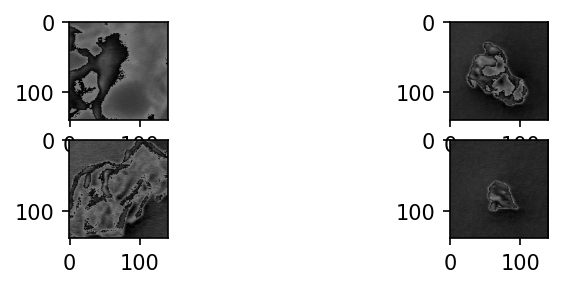

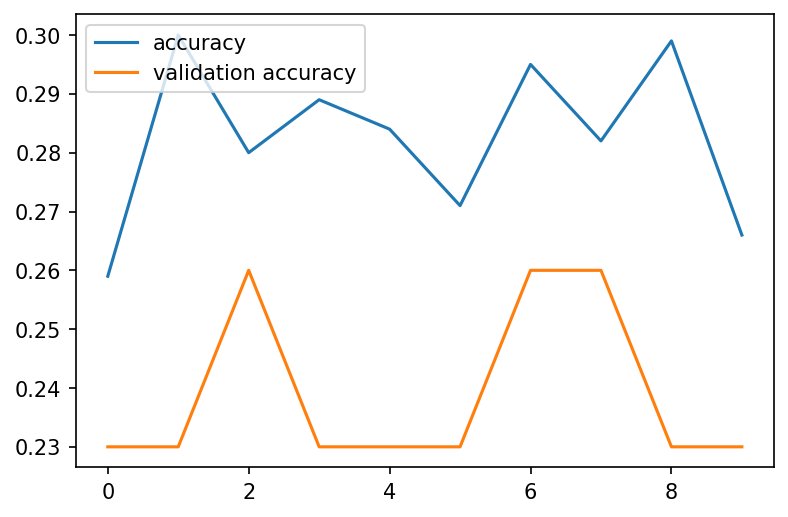

In [18]:
plt.figure(dpi=150)
plt.subplot(421)
plt.imshow(testImagesRGB[0,:,:,:])
plt.subplot(422)
plt.imshow(testImagesRGB[1,:,:,:])
plt.subplot(423)
plt.imshow(testImagesRGB[5,:,:,:])
plt.subplot(424)
plt.imshow(testImagesRGB[10,:,:,:])

plt.figure(dpi=150)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

In [19]:
yPred = cnnModel.predict(testImagesRGB)

In [20]:
print(testImagesRGB[0,:,:,:] == testImagesRGB[10,:,:,:])
print(yPred[0,:]==yPred[15,:])
print(yPred[0,:])
print(yPred[15,:])

[[[False False False]
  [False False False]
  [False False False]
  ...
  [False False False]
  [False False False]
  [False False False]]

 [[False False False]
  [False False False]
  [False False False]
  ...
  [False False False]
  [False False False]
  [False False False]]

 [[False False False]
  [False False False]
  [False False False]
  ...
  [False False False]
  [False False False]
  [False False False]]

 ...

 [[False False False]
  [False False False]
  [False False False]
  ...
  [False False False]
  [False False False]
  [False False False]]

 [[False False False]
  [False False False]
  [False False False]
  ...
  [False False False]
  [False False False]
  [False False False]]

 [[False False False]
  [False False False]
  [False False False]
  ...
  [False False False]
  [False False False]
  [False False False]]]
[False False False False False False False False]
[0.2814287  0.2905359  0.11136997 0.03321032 0.0944882  0.07328815
 0.02643743 0.08924137]
[0.28142858 0

In [39]:
yTestClass.shape

(3980,)

0.0


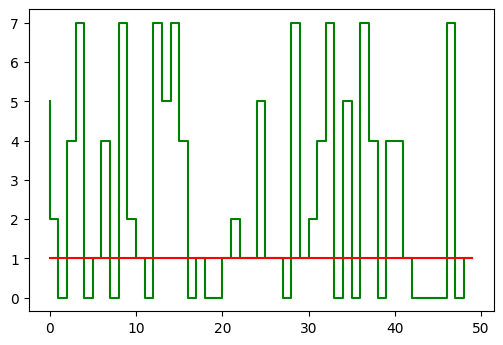

In [51]:
accuracyMetricFn = tf.keras.metrics.Accuracy()
accuracyMetricFn.update_state(yTest, yPred)
print(accuracyMetricFn.result().numpy())

yPredClass = yPred.argmax(axis=1)
yTestClass = yTest.argmax(axis=1)

plt.figure(dpi=100)
plt.step(yTestClass[0:50], 'g')
plt.step(yPredClass[0:50], 'r')
plt.show()

# To Do:

* NORMALIZE images and retrain
* Convert categorical output variables to numbers
* Check whether predictions using the training data are different from each other
* Change CNN structure according to Jared's paper and retrain
* Use sigmoid activation function in last layer and crossentropy and re-train (binary classification)

## Old Code

### Run object detection algorithm (Later)

In [ ]:
'''
execution_path = os.getcwd()

detector = ObjectDetection()
# detector.setModelTypeAsRetinaNet()
# detector.setModelPath(os.path.join(execution_path , "resnet50_coco_best_v2.1.0.h5"))
detector.setModelTypeAsYOLOv3()
detector.setModelPath(os.path.join(execution_path , "pretrained-yolov3.h5"))
detector.loadModel()
# detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path, "defectImage.jpeg"), output_image_path=os.path.join(execution_path , "defectImageID.jpg"))
detections = detector.detectObjectsFromImage(input_type = "array", input_image=aaRGB, output_image_path=os.path.join(execution_path , "Defect_Images/defectImageID.jpg"))


for eachObject in detections:
    print(eachObject["name"] , " : " , eachObject["percentage_probability"] )
    
'''

In [ ]:
# Load
# [...]

# Outlier detection using clustering?
# [...]

# Data augmentation by roating 60 degrees
# [...]
# rotate = tfa.image.rotate(img, tf.constant(np.pi/3))
# visualize(image, rotated)
